MTTF: 10000.0
R(1000): 0.904837418035960
R(t): exp(-0.0001*t)
R(t=100): 0.990049833749168

--- Simple series system ---
System reliability R(t): exp(-1001*t/1000000)
System MTTF (symbolic): 1000000/1001
System MTTF (float): 999.000999000999


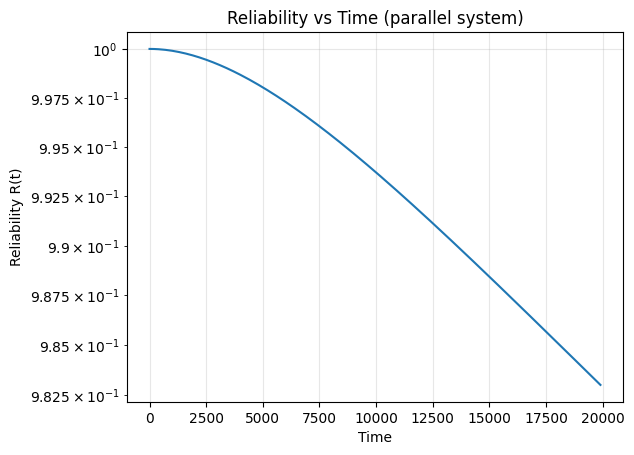

In [7]:
# ============================================================
# Fiabilipy tutorial — Python 3.9 compatible (monkey-patch)
# ============================================================

import fiabilipy.system as fs
import functools

# Patch Python2-only stuff inside fiabilipy.system
fs.xrange = getattr(fs, "xrange", range)
fs.reduce = getattr(fs, "reduce", functools.reduce)

from fiabilipy import Component, System
from sympy import Symbol
import matplotlib.pyplot as plt

t = Symbol("t", positive=True)

# 1) Component
comp = Component("C0", 1e-4)
print("MTTF:", comp.mttf)
print("R(1000):", comp.reliability(1000))
print("R(t):", comp.reliability(t))
print("R(t=100):", comp.reliability(t=100))

# 2) Simple series system
power = Component("P0", 1e-6)
motor = Component("M0", 1e-3)

S = System()
S["E"] = [power]
S[power] = [motor]
S[motor] = "S"

print("\n--- Simple series system ---")
print("System reliability R(t):", S.reliability(t))
print("System MTTF (symbolic):", S.mttf)
print("System MTTF (float):", float(S.mttf))

# 3) Plot reliability of a parallel system
a_par, b_par = Component("a", 1e-4), Component("b", 1e-6)
S3 = System()
S3["E"] = [a_par, b_par]
S3[a_par] = "S"
S3[b_par] = "S"

timerange = list(range(0, 20000, 100))
reliability_vals = [float(S3.reliability(tt)) for tt in timerange]

plt.figure()
plt.plot(timerange, reliability_vals,)
plt.yscale("log")
plt.xlabel("Time")
plt.ylabel("Reliability R(t)")
plt.title("Reliability vs Time (parallel system)")
plt.grid(True, alpha=0.3)
plt.show()
